# Final Code - EAS503 - gc54

In [1]:
import sqlite3 as sql3
import pandas as pd
import numpy as ny
import matplotlib as mpl
import os
import sklearn as sk
import seaborn as sns
import mlflow as mf
import dagshub as dh

In [2]:
data=pd.read_csv("C:\\Users\\cgaur\\Box\\Fall'24 Semester\\EAS 503 - Intro to Programming\\Final Project\\Data\\adult.csv")

Normalization of data

In [3]:
db_name='database_gc54.db'
conn=sql3.connect(db_name)
cursor=conn.cursor()

In [4]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS COUNTRY(
               country_id INT NOT NULL PRIMARY KEY,
               country TEXT NOT NULL
               )
               ''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS EDUCATION(
               education_id INT  NOT NULL PRIMARY KEY,
               education TEXT NOT NULL,
               education_num INT NOT NULL
               )
               ''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS RACE(
               race_id INT  NOT NULL PRIMARY KEY,
               race TEXT NOT NULL
               )
               ''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS OCCUPATION(
               occupation_id INT  NOT NULL PRIMARY KEY,
               occupation TEXT NOT NULL
               )
               ''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS WORKCLASS(
              workclass_id INT  NOT NULL PRIMARY KEY,
               workclass TEXT NOT NULL
               )
               ''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Marital_Status(
               marital_status_id INT  NOT NULL PRIMARY KEY,
               marital_status TEXT NOT NULL
               )
               ''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Relationship(
               relationship_id INT  NOT NULL PRIMARY KEY,
               relationship TEXT NOT NULL
               )
               ''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Gender(
               gender_id INT  NOT NULL PRIMARY KEY,
               gender TEXT NOT NULL
               )
               ''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Person_income(
               person_id INT  NOT NULL PRIMARY KEY,
               country_id INT NOT NULL,
               education_id INT NOT NULL,
               race_id INT NOT NULL,
               occupation_id INT NOT NULL,
               workclass_id INT NOT NULL,
               marital_status_id INT NOT NULL,
               relationship_id INT NOT NULL,
               gender_id INT NOT NULL,
               age INT NOT NULL,
               fnlwgt INT NOT NULL,
               capital_gain INT NOT NULL,
               capital_loss INT NOT NULL,
               hours_per_week INT NOT NULL,
               income_class TEXT NOT NULL

               )
               ''')

conn.commit()

In [5]:
lookup_values = {
    "countries": data["native-country"].unique().tolist(),
    "education": data[["education", "educational-num"]].drop_duplicates().values.tolist(),
    "races": data["race"].unique().tolist(),
    "occupations": data["occupation"].unique().tolist(),
    "workclasses": data["workclass"].unique().tolist(),
    "marital_statuses": data["marital-status"].unique().tolist(),
    "relationships": data["relationship"].unique().tolist(),
    "genders": data["gender"].unique().tolist(),
}

# Prepare each list into a list of tuples
tuples_for_insertion = {
    "countries": [(i + 1, lookup_values["countries"][i]) for i in range(0, len(lookup_values["countries"]))],
    "education": [(i + 1, education[0], education[1]) for i, education in enumerate(lookup_values["education"])],
    "races": [(i + 1, race) for i, race in enumerate(lookup_values["races"])],
    "occupations": [(i + 1, occupation) for i, occupation in enumerate(lookup_values["occupations"])],
    "workclasses": [(i + 1, workclass) for i, workclass in enumerate(lookup_values["workclasses"])],
    "marital_statuses": [(i + 1, status) for i, status in enumerate(lookup_values["marital_statuses"])],
    "relationships": [(i + 1, relationship) for i, relationship in enumerate(lookup_values["relationships"])],
    "genders": [(i + 1, gender) for i, gender in enumerate(lookup_values["genders"])],
}



In [6]:

cursor.executemany('''
INSERT INTO country(country_id,country) values(?,?)
                   ''',tuples_for_insertion['countries'])

# Insert data for each table using the appropriate query
cursor.executemany('''
INSERT INTO EDUCATION (education_id, education, education_num)
VALUES (?, ?, ?)
''', tuples_for_insertion['education'])

cursor.executemany('''
INSERT INTO RACE (race_id, race)
VALUES (?, ?)
''', tuples_for_insertion['races'])

cursor.executemany('''
INSERT INTO OCCUPATION (occupation_id, occupation)
VALUES (?, ?)
''', tuples_for_insertion['occupations'])

cursor.executemany('''
INSERT INTO WORKCLASS (workclass_id, workclass)
VALUES (?, ?)
''', tuples_for_insertion['workclasses'])

cursor.executemany('''
INSERT INTO Marital_Status (marital_status_id, marital_status)
VALUES (?, ?)
''', tuples_for_insertion['marital_statuses'])

cursor.executemany('''
INSERT INTO Relationship (relationship_id, relationship)
VALUES (?, ?)
''', tuples_for_insertion['relationships'])

cursor.executemany('''
INSERT INTO Gender (gender_id, gender)
VALUES (?, ?)
''', tuples_for_insertion['genders'])


In [7]:
cursor.execute("SELECT country_id, country FROM country")
countries_dict = {country: country_id for country_id, country in cursor.fetchall()}

cursor.execute("SELECT education_id, education FROM education")
education_dict = {education: education_id for education_id, education in cursor.fetchall()}

cursor.execute("SELECT race_id, race FROM race")
races_dict = {race: race_id for race_id, race in cursor.fetchall()}

cursor.execute("SELECT occupation_id, occupation FROM occupation")
occupations_dict = {occupation: occupation_id for occupation_id, occupation in cursor.fetchall()}

cursor.execute("SELECT workclass_id, workclass FROM workclass")
workclasses_dict = {workclass: workclass_id for workclass_id, workclass in cursor.fetchall()}

cursor.execute("SELECT marital_status_id, marital_status FROM marital_status")
marital_statuses_dict = {status: marital_status_id for marital_status_id, status in cursor.fetchall()}

cursor.execute("SELECT relationship_id, relationship FROM relationship")
relationships_dict = {relationship: relationship_id for relationship_id, relationship in cursor.fetchall()}

cursor.execute("SELECT gender_id, gender FROM gender")
genders_dict = {gender: gender_id for gender_id, gender in cursor.fetchall()}

In [8]:
data_with_id=data

In [9]:
data_with_id['native-country']=data_with_id['native-country'].replace(countries_dict)
data_with_id['education']=data_with_id['education'].replace(education_dict)
data_with_id['race']=data_with_id['race'].replace(races_dict)
data_with_id['occupation']=data_with_id['occupation'].replace(occupations_dict)
data_with_id['workclass']=data_with_id['workclass'].replace(workclasses_dict)
data_with_id['marital-status']=data_with_id['marital-status'].replace(marital_statuses_dict)
data_with_id['relationship']=data_with_id['relationship'].replace(relationships_dict)
data_with_id['gender']=data_with_id['gender'].replace(genders_dict)

C:\Users\cgaur\AppData\Local\Temp\ipykernel_42156\2867704570.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_with_id['native-country']=data_with_id['native-country'].replace(countries_dict)
C:\Users\cgaur\AppData\Local\Temp\ipykernel_42156\2867704570.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_with_id['education']=data_with_id['education'].replace(education_dict)
C:\Users\cgaur\AppData\Local\Temp\ipykernel_42156\2867704570.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

In [10]:
tuple_for_final=[(i+1,int(data_with_id.iloc[i,13]),int(data_with_id.iloc[i,3]),int(data_with_id.iloc[i,8]),int(data_with_id.iloc[i,6]),int(data_with_id.iloc[i,1]),int(data_with_id.iloc[i,5]),int(data_with_id.iloc[i,7]),int(data_with_id.iloc[i,9]),int(data_with_id.iloc[i,0]),int(data_with_id.iloc[i,2]),int(data_with_id.iloc[i,10]),int(data_with_id.iloc[i,11]),int(data_with_id.iloc[i,12]),data_with_id.iloc[i,14]) for i in range(0,data_with_id.shape[0])]

In [11]:
tuple_for_final[1]

(2, 1, 2, 2, 2, 1, 2, 2, 1, 38, 89814, 0, 0, 50, '<=50K')

In [12]:
cursor.executemany('''
INSERT INTO Person_income(
    person_id, country_id, education_id, race_id, occupation_id, workclass_id, 
    marital_status_id, relationship_id, gender_id, age, fnlwgt, capital_gain, 
    capital_loss, hours_per_week, income_class
) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
''', tuple_for_final)

conn.commit()


Normalization Complete. Start with ML Model Application

In [13]:
data_int=pd.read_sql_query(''' SELECT 
    pi.age,
    w.workclass,
    pi.fnlwgt,
    e.education,
    e.education_num,
    ms.marital_status,
    o.occupation,
    rel.relationship,
    r.race,
    g.gender,
    pi.capital_gain,
    pi.capital_loss,
    pi.hours_per_week,
    c.country,
    pi.income_class
FROM 
    Person_income pi
JOIN 
    COUNTRY c ON pi.country_id = c.country_id
JOIN 
    EDUCATION e ON pi.education_id = e.education_id
JOIN 
    RACE r ON pi.race_id = r.race_id
JOIN 
    OCCUPATION o ON pi.occupation_id = o.occupation_id
JOIN 
    WORKCLASS w ON pi.workclass_id = w.workclass_id
JOIN 
    Marital_Status ms ON pi.marital_status_id = ms.marital_status_id
JOIN 
    Relationship rel ON pi.relationship_id = rel.relationship_id
JOIN 
    Gender g ON pi.gender_id = g.gender_id;
''',conn)

conn.close()

Convert data to Train Test.

In [14]:
from sklearn.model_selection import train_test_split
data_final=data_int.copy(deep=True)
data_final['income_class']=data_final['income_class'].apply((lambda x: 1 if x=='>50K' else 0))
x=data_final.drop(['income_class'],axis=1)
y=data_final['income_class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45,stratify=y) 
#Data needs stratification as there is variation in income class

train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)


Y data Profiling and Data Cleanup

In [15]:
# from ydata_profiling import ProfileReport

# # Generate profile report for the DataFrame
# profile = ProfileReport(train_data, title="Data Exploration Report", explorative=True)

# # Save or display the report
# profile.to_file("data_report.html")  # Save as an HTML file
# profile.to_notebook_iframe()

In [16]:
train_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
income_class      0
dtype: int64

In [17]:
import matplotlib.pyplot as plt
import mlflow
train_data.describe()
train_data.hist(figsize=(12, 10))

# Save the plot locally first
plt.savefig('train_data_histogram.png')

# Close the plot to avoid it showing on screen
plt.close()

# Log the plot to MLFlow
with mlflow.start_run(run_name='Histograms of features',nested=True):
    mlflow.log_artifact('train_data_histogram.png')
mlflow.end_run


<function mlflow.tracking.fluent.end_run(status: str = 'FINISHED') -> None>

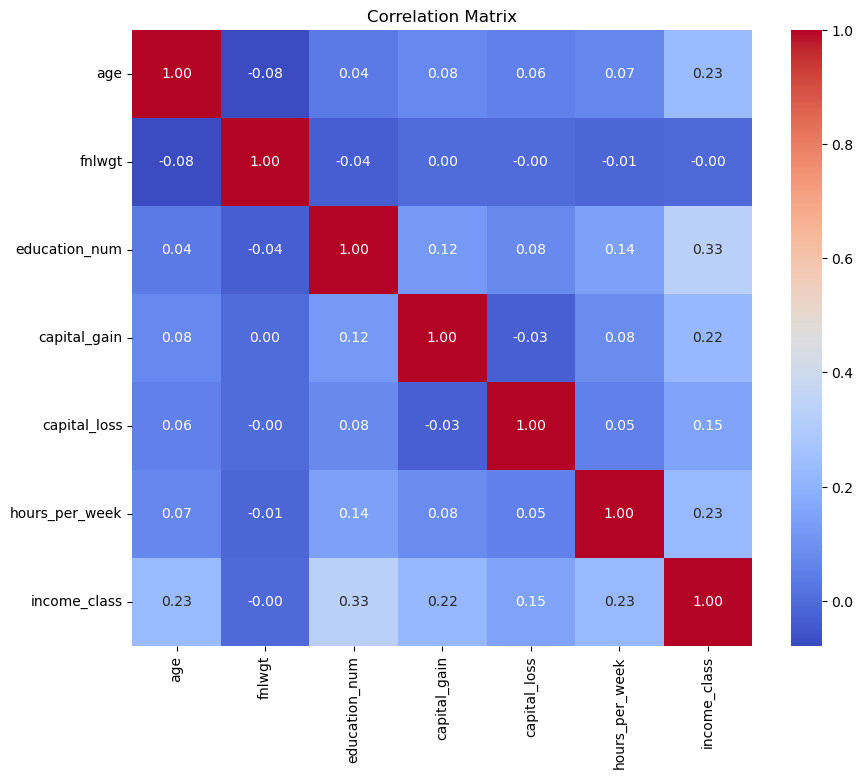

<function mlflow.tracking.fluent.end_run(status: str = 'FINISHED') -> None>

In [18]:
import matplotlib.pyplot as plt

# Compute correlation matrix
train_data_numeric=train_data.select_dtypes(['number'])
corr_matrix = train_data_numeric.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
# Save the plot locally first
plt.savefig('corr_matrix.png')
plt.show()

# Log the plot to MLFlow
with mlflow.start_run(run_name='Correlation',nested=True):
    mlflow.log_artifact('corr_matrix.png')
mlflow.end_run


There are no missing values as such in the numeric data. 
Categorical columns have ? at some places, which I believe would be enocoded and be taken care of by the models.
Some outliers in Capital Gain but not removing right now.


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, make_scorer
import mlflow
from mlflow import sklearn
from sklearn.model_selection import StratifiedKFold, cross_val_score

dh.init(repo_owner='gc54',
             repo_name='EAS503_Project',
             mlflow=True)

Accessing as gc54

Initialized MLflow to track repo "gc54/EAS503_Project"

Repository gc54/EAS503_Project initialized!

Creating Logistic Regression Model and Pipeline

In [20]:

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

preprocessor_lr= ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('minmax', MinMaxScaler()),
            ('log', FunctionTransformer(np.log1p))
        ]), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_lr),
    ('classifier', LogisticRegression(max_iter=1000))
])

Performing CV and logging results to MLFlow. The results are not so good. some issue with accuracy of 

In [21]:
scoring = {'f1': make_scorer(f1_score), 'conf_matrix': make_scorer(confusion_matrix)}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results_lr = cross_validate(
    pipeline_lr, x_train, y_train,
    cv=stratified_kfold,
    scoring='f1',
    return_train_score=True
)

a= [0 if (x is None or pd.isna(x)) else x for x in cv_results_lr['train_score']]
cv_results_lr['train_score']=a

with mlflow.start_run():
    mlflow.log_metric("mean_f1", cv_results_lr['test_score'].mean())
    mlflow.log_metric("std_f1", cv_results_lr['test_score'].std())
    
    sklearn.log_model(pipeline_lr, "Logistic_Regression_Model")

# Evaluate on test set
pipeline_lr.fit(x_train, y_train)
y_pred = pipeline_lr.predict(x_test)

f1_lr = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

with mlflow.start_run():
    mlflow.log_metric("test_f1", f1_lr)
    mlflow.log_metric("tp", tp)
    mlflow.log_metric("tn", tn)
    mlflow.log_metric("fp", fp)
    mlflow.log_metric("fn", fn)

C:\Users\cgaur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\cgaur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\cgaur\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\cgaur\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\cgaur\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _

2024/12/21 17:07:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run fearless-wren-698 at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/57e23f58a898404e96705a914da947bf
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


🏃 View run nosy-bear-1 at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/ab1c15a332a44d438647b8a9e9c8ff75
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


Hyper Parameter Tuning

In [22]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': [ 'l2']
}

grid_search = GridSearchCV(pipeline_lr, param_grid, cv=10, scoring='f1', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
mlflow.log_params(grid_search.best_params_)

C:\Users\cgaur\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Experiment 2 - Applying Other Models

In [23]:
from sklearn.metrics import f1_score, confusion_matrix, make_scorer
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

# Define numeric and categorical columns
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numeric data: Scaling & imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Can replace with MinMaxScaler if needed
])

# Preprocessing for categorical data: Imputation & OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Custom scoring function for confusion matrix
def confusion_matrix_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return {
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn
    }

# Define scoring function for cross-validation
scoring = {
    'f1': make_scorer(f1_score, average='weighted'),
    'conf_matrix': make_scorer(confusion_matrix_metrics)
}

# Function to run and log results for different models, and return cv_results
def run_model(model, model_name, x_train, y_train):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    with mlflow.start_run(nested=True):
        mlflow.log_param("classifier", model_name)
        
        # Perform cross-validation
        cv_results = cross_validate(pipeline, x_train, y_train, cv=stratified_kfold, scoring='f1', return_train_score=True)
        
        # Log F1-score results
        mlflow.log_metric("mean_f1", cv_results['test_score'].mean())
        mlflow.log_metric("std_f1", cv_results['test_score'].std())
        
        # Log confusion matrix results
        pipeline.fit(x_train,y_train)
        y_pred=pipeline.predict(x_test)
        abc=confusion_matrix_metrics(y_test, y_pred)

        mlflow.log_metric("mean_tp", abc['TP'])
        mlflow.log_metric("mean_tn", abc['TN'])
        mlflow.log_metric("mean_fp", abc['FP'])
        mlflow.log_metric("mean_fn", abc['FN'])
        
        # Log the trained model
        mlflow.sklearn.log_model(pipeline, f"{model_name}_Model")
        mlflow.end_run()
        return cv_results




In [24]:
# Example usage with different classifiers:
# Logistic Regression
log_reg = LogisticRegression()
log_reg_results = run_model(log_reg, "Logistic Regression", x_train, y_train)



2024/12/21 17:08:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run mysterious-snail-253 at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/4d8a0eb0608e4417a7e7798be38e70b6
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


In [25]:
# Ridge Classifier
ridge_clf = RidgeClassifier()
ridge_results = run_model(ridge_clf, "Ridge Classifier", x_train, y_train)



2024/12/21 17:08:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run popular-fly-774 at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/6d81f0558e2a4c1bae30fe80c80bbebc
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


In [26]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_results = run_model(rf_clf, "Random Forest", x_train, y_train)



🏃 View run nimble-moth-88 at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/04da9ba585fe4843a4cc92dbded28836
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


In [27]:
# # XGBoost Classifier
# xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss')
# xgb_results = run_model(xgb_clf, "XGBoost", x_train, y_train)

Experiment 3 - Grouped two of the columns that are better understood in range than the number itself

In [28]:
from sklearn.metrics import f1_score, confusion_matrix, make_scorer
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

# Define numeric and categorical columns

x_train2=x_train.copy(deep=True)
x_test2=x_test.copy(deep=True)

x_train2['age_group']=pd.cut(x_train2['age'], bins=[20, 30, 40, 50, 60], labels=["20-30", "30-40", "40-50", "50-60"])
x_train2['weekly_hours_range']=pd.cut(x_train2['hours_per_week'], bins=[0,35, 50, 70,100], labels=["0-35", "35-50", "50-70", "70-100"])

x_train2['age_group'] = x_train2['age_group'].astype('object')
x_train2['weekly_hours_range'] = x_train2['age_group'].astype('object')

x_test2['age_group']=pd.cut(x_test2['age'], bins=[20, 30, 40, 50, 60], labels=["20-30", "30-40", "40-50", "50-60"])
x_test2['weekly_hours_range']=pd.cut(x_test2['hours_per_week'], bins=[0,35, 50, 70,100], labels=["0-35", "35-50", "50-70", "70-100"])

x_test2['age_group'] = x_test2['age_group'].astype('object')
x_test2['weekly_hours_range'] = x_test2['age_group'].astype('object')

numeric_features = x_train2.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x_train2.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numeric data: Scaling & imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Can replace with MinMaxScaler if needed
])

# Preprocessing for categorical data: Imputation & OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Custom scoring function for confusion matrix
def confusion_matrix_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return {
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn
    }

# Define scoring function for cross-validation
scoring = {
    'f1': make_scorer(f1_score, average='weighted'),
    'conf_matrix': make_scorer(confusion_matrix_metrics)
}

# Function to run and log results for different models, and return cv_results
def run_model2(model, model_name, x_train2, y_train):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    with mlflow.start_run(run_name=model_name,nested=True):
        mlflow.log_param("classifier after feature engineering", model_name)
        
        # Perform cross-validation
        cv_results = cross_validate(pipeline, x_train2, y_train, cv=stratified_kfold, scoring='f1', return_train_score=True)
        
        # Log F1-score results
        mlflow.log_metric("mean_f1", cv_results['test_score'].mean())
        mlflow.log_metric("std_f1", cv_results['test_score'].std())
        
        # Log confusion matrix results
        pipeline.fit(x_train2,y_train)
        y_pred=pipeline.predict(x_test2)
        abc=confusion_matrix_metrics(y_test, y_pred)

        mlflow.log_metric("mean_tp", abc['TP'])
        mlflow.log_metric("mean_tn", abc['TN'])
        mlflow.log_metric("mean_fp", abc['FP'])
        mlflow.log_metric("mean_fn", abc['FN'])
        
        # Log the trained model
        mlflow.sklearn.log_model(pipeline, f"{model_name}_Model")
        
        return cv_results


In [29]:
# Example usage with different classifiers:
# Logistic Regression
log_reg = LogisticRegression()
log_reg_results2 = run_model2(log_reg, "Logistic Regression", x_train2, y_train)


# Ridge Classifier
ridge_clf = RidgeClassifier()
ridge_results2 = run_model2(ridge_clf, "Ridge Classifier", x_train2, y_train)


# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_results2 = run_model2(rf_clf, "Random Forest", x_train2, y_train)



2024/12/20 21:29:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/528539bda1e7410c9f847ddfe441e03d
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


2024/12/20 21:29:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Ridge Classifier at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/d92c0518cada43418ae969c08e4905ee
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


2024/12/20 21:32:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/bc2c900a06644a58b6aca5c6862d553c
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


Feature Selection using correlation, variance analysis, VIP

In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import mlflow


numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x_train.select_dtypes(include=['object']).columns.tolist()

mlflow.start_run(run_name="Feature corrlation",nested=True)

# Step 1: Correlation Threshold (Only for numeric columns)
numeric_data = x_train[numeric_features]
correlation_matrix = numeric_data.corr()
correlation_threshold = 0.85
to_drop = []

for i in range(correlation_matrix.shape[1]):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            to_drop.append(colname)

X_corr = numeric_data.drop(columns=to_drop)
mlflow.log_metric("Features_After_Correlation_Filter", X_corr.shape[1])
mlflow.log_text(f"Removed features (Correlation Threshold): {to_drop}", "correlation_filter.txt")

mlflow.end_run()



🏃 View run Feature corrlation at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/228e2432909f46ce99cc33a854794344
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


Since there are no correlated features to remove, we are not taking any steps of removing the features

In [31]:
# Preprocessing for numeric data: Scaling & imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Can replace with MinMaxScaler if needed
])

# Preprocessing for categorical data: Imputation & OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

x_transformed=preprocessor.fit_transform(x_train)

mlflow.start_run(run_name="Variance Threshold",nested=True)

# Step 1: Variance Threshold
vt = VarianceThreshold(threshold=0.01)  # Remove low variance features
x_var = vt.fit_transform(x_transformed)
selected_features_var = np.array(preprocessor.get_feature_names_out())[vt.get_support()]

mlflow.log_metric("Features_After_Variance_Threshold", len(selected_features_var))
mlflow.log_text(f"Selected features (Variance Threshold): {list(selected_features_var)}", "variance_threshold.txt")



# End MLFlow
mlflow.end_run()

🏃 View run Variance Threshold at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/8148a8d6b2124a6497fc1ccb53dcab37
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


In [32]:

mlflow.start_run(run_name="Important Features",nested=True)
# Step 3: Feature Importance (Random Forest on the fully transformed dataset)
rf = RandomForestClassifier(random_state=42)
rf.fit(x_var, y_train)

# Feature importance
importance = rf.feature_importances_
selected_features_rf = np.array(selected_features_var)[np.argsort(importance)[::-1][:5]]  # Top 5 features

mlflow.log_metric("Top_Features_Count", len(selected_features_rf))
mlflow.log_text(f"Top features (Random Forest): {list(selected_features_rf)}", "feature_importance.txt")

# Log Final Dataset
final_features = selected_features_rf
mlflow.log_metric("Final_Features_Count", len(final_features))
mlflow.log_text(f"Final features selected: {list(final_features)}", "final_features.txt")

mlflow.end_run()



🏃 View run Important Features at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/f7272339fc7a49e98083d3c2bdb44556
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


PCA

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

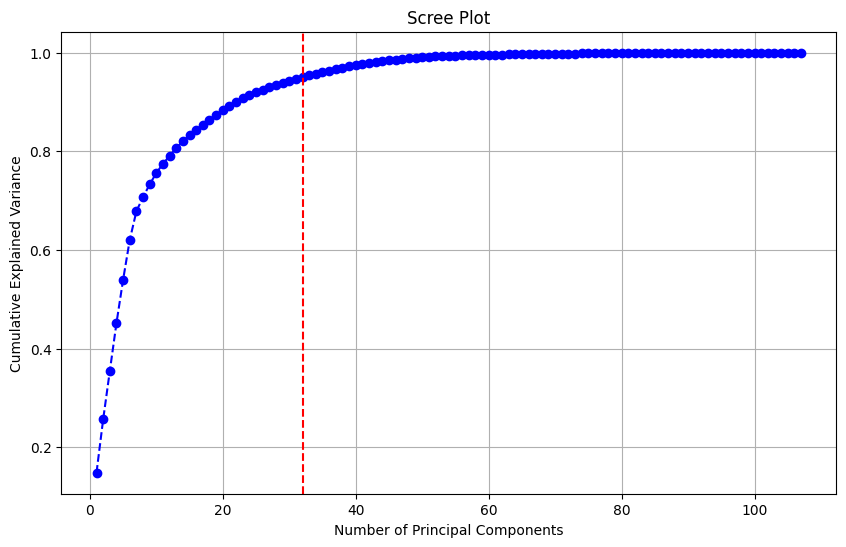

In [34]:
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numeric data: Scaling & imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Can replace with MinMaxScaler if needed
])

# Preprocessing for categorical data: Imputation & OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pca = PCA()  # Full PCA initially for scree plot

# Pipeline with Preprocessing and PCA
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("pca", pca)
])

# Fit PCA on Training Data
pipeline.fit(x_train)
X_train_transformed = pipeline.transform(x_train)

# Scree Plot
explained_variance_ratio = pipeline.named_steps["pca"].explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Identify components contributing to 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.axvline(x=n_components, color='r', linestyle='--', label=f"95% Variance ({n_components} Components)")
figure_path = "scree_plot.png"
plt.savefig(figure_path)
plt.show()

# Save the figure locally

    


In [35]:


# Update Pipeline with Selected Components
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=n_components)),
    ("classifier", LogisticRegression())
])

# Model Training and Evaluation
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Log Results in MLFlow
with mlflow.start_run(run_name='PCA and Logistic Regression',nested=True):
    mlflow.log_param("Model", "Logistic Regression")
    mlflow.log_param("PCA Components", n_components)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_dict({"confusion_matrix": conf_matrix.tolist()}, "confusion_matrix.json")
    mlflow.log_artifact(figure_path)
    mlflow.sklearn.log_model(pipeline, "pca with logistic regression")

2024/12/20 21:34:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run PCA and Logistic Regression at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/55ed1498de164b9fba98eab4ddcdff2d
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


KNN

In [36]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, confusion_matrix
import pandas as pd

# Assuming x_train and y_train are already defined
# Custom scoring function for confusion matrix


# Define preprocessor for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', knn)])

# Cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'f1': make_scorer(f1_score), 'conf_matrix': make_scorer(confusion_matrix)}

# Log results to MLFlow
mlflow.start_run(run_name='KNN',nested=True)
mlflow.log_param("classifier", "K-Nearest Neighbors")

# Perform cross-validation
cv_results_knn = cross_validate(pipeline, x_train, y_train, cv=stratified_kfold, scoring='f1', return_train_score=True)

# Log metrics and confusion matrix
mlflow.log_metric("mean_f1", cv_results_knn['test_score'].mean())
mlflow.log_metric("std_f1", cv_results_knn['test_score'].std())
mlflow.log_param("n_neighbors", 2)
# Model Training and Evaluation
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix_metrics(y_test, y_pred)

mlflow.log_metric("mean_tp", conf_matrix['TP'])
mlflow.log_metric("mean_tn", conf_matrix['TN'])
mlflow.log_metric("mean_fp", conf_matrix['FP'])
mlflow.log_metric("mean_fn", conf_matrix['FN'])

# Log confusion matrix and other metrics for further analysis

# Log the model
mlflow.sklearn.log_model(pipeline, "knn_model")

mlflow.end_run()


2024/12/20 23:08:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNN at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/f4c2c0cf6d8a460e9888a7d1ed57eabe
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


SVM

In [37]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, confusion_matrix
import pandas as pd



# Define preprocessor for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Initialize the SVM classifier
svm = SVC(kernel='linear', random_state=42)

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', svm)])

# Cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'f1': make_scorer(f1_score), 'conf_matrix': make_scorer(confusion_matrix)}

# Log results to MLFlow
with mlflow.start_run(run_name='SVM',nested=True):
    mlflow.log_param("classifier", "Support Vector Machine")
    
    # Perform cross-validation
    cv_results_svm = cross_validate(pipeline, x_train, y_train, cv=stratified_kfold, scoring='f1', return_train_score=True)
    
    # Log metrics and confusion matrix
    mlflow.log_metric("mean_f1", cv_results_svm['test_score'].mean())
    mlflow.log_metric("std_f1", cv_results_svm['test_score'].std())
    # Model Training and Evaluation
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)

    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix_metrics(y_test, y_pred)

    mlflow.log_metric("mean_tp", conf_matrix['TP'])
    mlflow.log_metric("mean_tn", conf_matrix['TN'])
    mlflow.log_metric("mean_fp", conf_matrix['FP'])
    mlflow.log_metric("mean_fn", conf_matrix['FN'])

    # Log the model
    mlflow.sklearn.log_model(pipeline, "svm_model")

mlflow.end_run()


2024/12/20 23:14:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/b45fec77732746af87c8476989035002
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0
🏃 View run agreeable-pug-189 at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/a49c6a6380d642c690552779bd456879
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


F1 Score Comparison and Model Selection

In [38]:
model_performance={}
model_performance['LR']=log_reg_results['test_score']
model_performance['Ridge']=ridge_results['test_score']
model_performance['RF']=rf_results['test_score']
model_performance['KNN']=log_reg_results['test_score']
model_performance['SVM']=log_reg_results['test_score']

mean_model_performance={}
mean_model_performance['LR']=model_performance['LR'].mean()
mean_model_performance['Ridge']=model_performance['Ridge'].mean()
mean_model_performance['RF']=model_performance['RF'].mean()
mean_model_performance['KNN']=model_performance['KNN'].mean()
mean_model_performance['SVM']=model_performance['SVM'].mean()

C:\Users\cgaur\AppData\Local\Temp\ipykernel_11620\1054637025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df, x='Model', y='F1 Score', palette='Blues_d')


🏃 View run Overall Model Results at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/792126453ec24aef9008f9cc88c02402
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


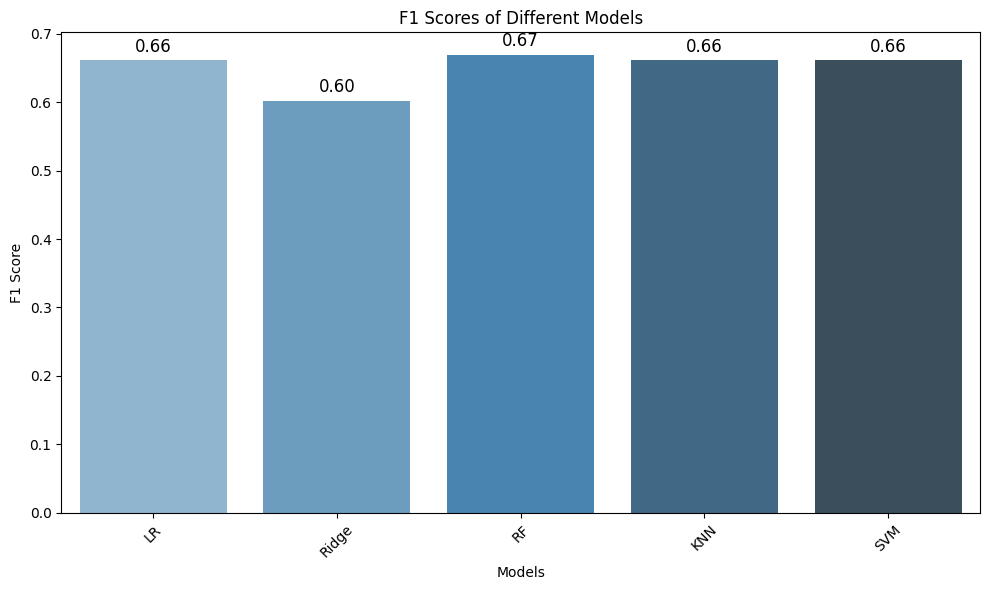

In [39]:
df = pd.DataFrame(list(mean_model_performance.items()), columns=['Model', 'F1 Score'])

# Plotting using seaborn
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=df, x='Model', y='F1 Score', palette='Blues_d')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.title('F1 Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
figure_path_model_performances='overall_model_performance.png'
plt.savefig(figure_path_model_performances)

best_model_f1=0
best_model_name=''

for key,value in mean_model_performance.items():
    if value>best_model_f1:
        best_model_f1=value
        best_model_name=key
    else:
        continue


mlflow.start_run(run_name='Overall Model Results',nested=True)
mlflow.log_param("Best Model", best_model_name)
mlflow.log_metric("Best Model F1", best_model_f1)
mlflow.log_dict(mean_model_performance, "Mean_Performance.json")
mlflow.log_dict(model_performance, "Model_Performance.json")
mlflow.log_artifact(figure_path_model_performances)

mlflow.end_run()



Saving the Model with Preprocessing to Joblib

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


# Preprocessing for numeric data: Scaling & imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Can replace with MinMaxScaler if needed
])

# Preprocessing for categorical data: Imputation & OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']),
        ('cat', categorical_transformer, ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'country'])
    ]
)

# Define the classifier
classifier = RandomForestClassifier()

# Create a pipeline with preprocessing and the classifier
pipeline_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Fit the pipeline on the training data
pipeline_final.fit(x_train, y_train)

mlflow.start_run(run_name='Final Model',nested=True)
mlflow.sklearn.log_model(pipeline_final, "random_forest_model")
mlflow.end_run()


2024/12/20 23:15:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Final Model at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0/runs/9e357fb935584d7b9282a7984db49d5c
🧪 View experiment at: https://dagshub.com/gc54/EAS503_Project.mlflow/#/experiments/0


In [41]:
import joblib
joblib.dump(pipeline_final, 'random_forest_pipeline.pkl')

['random_forest_pipeline.pkl']

Fast API app creation

In [42]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the trained model
model = joblib.load('random_forest_pipeline.pkl')  # Adjust with the path to your model

Fastapi_app_gc54 = FastAPI()

# Define input data schema using Pydantic
class PredictionRequest(BaseModel):
    age   :  int
    workclass   :  str
    fnlwgt   :  int
    education   :  str
    education_num   :  int
    marital_status   :  str
    occupation   :  str
    relationship   :  str
    race   :  str
    gender   :  str
    capital_gain   :  int
    capital_loss   :  int
    hours_per_week   :  int
    country   :  str
    # Add other necessary features here

# Endpoint for making predictions
@Fastapi_app_gc54.post("/predict/")
def predict(request: PredictionRequest):
    data = np.array([[request.age,
                        request. workclass,
                        request. fnlwgt,
                        request. education,
                        request. education_num,
                        request. marital_status,
                        request. occupation,
                        request. relationship,
                        request. race,
                        request. gender,
                        request. capital_gain,
                        request. capital_loss,
                        request. hours_per_week,
                        request. country,
]])  # Prepare input data



    prediction = model.predict(data)
    return {"prediction": prediction.tolist()}

# You can add more endpoints as needed (e.g., for training, model details, etc.)
